In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates


In [32]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
cleveland_data = pd.read_csv('processed.cleveland.data', header=None, names=column_names, na_values="?")

# print(cleveland_data['trestbps'].head())

### Заповнення пропущених значень середнім

In [33]:
df=pd.DataFrame(cleveland_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [34]:
for column in cleveland_data.columns:
    if cleveland_data[column].dtype == 'float64' or cleveland_data[column].dtype == 'int64':
        cleveland_data[column].fillna(cleveland_data[column].mean(), inplace=True)
    elif cleveland_data[column].dtype == 'object':
        cleveland_data[column].fillna(cleveland_data[column].mode()[0], inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_25836\1667361405.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleveland_data[column].fillna(cleveland_data[column].mean(), inplace=True)


### Нормування та стандартизація 

In [35]:
def normalize(data):
    min_val = np.min(data, axis=0) 
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val)

In [36]:
def standardize(data):
    mean_val = np.mean(data, axis=0)  
    std_val = np.std(data, axis=0)
    return (data - mean_val) / std_val 


In [37]:
numerical_data = cleveland_data.iloc[:, :-1].to_numpy()
normalized_data = normalize(numerical_data)
standardized_data = standardize(numerical_data)

### Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах

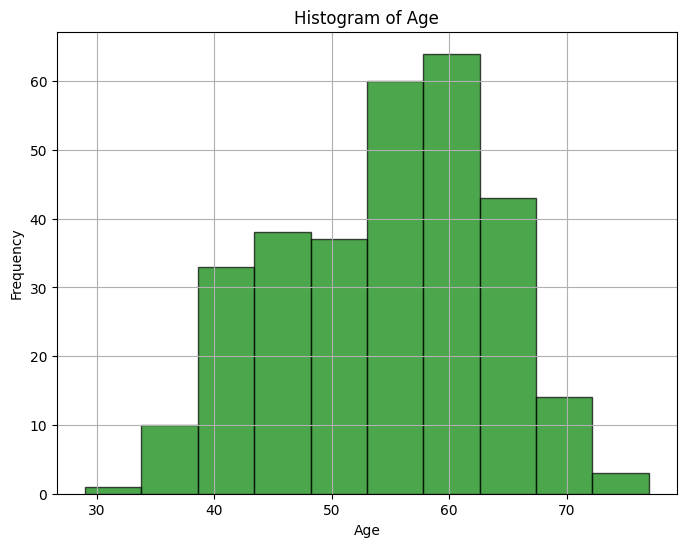

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(cleveland_data['age'], bins=10, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Збудувати графік залежності 

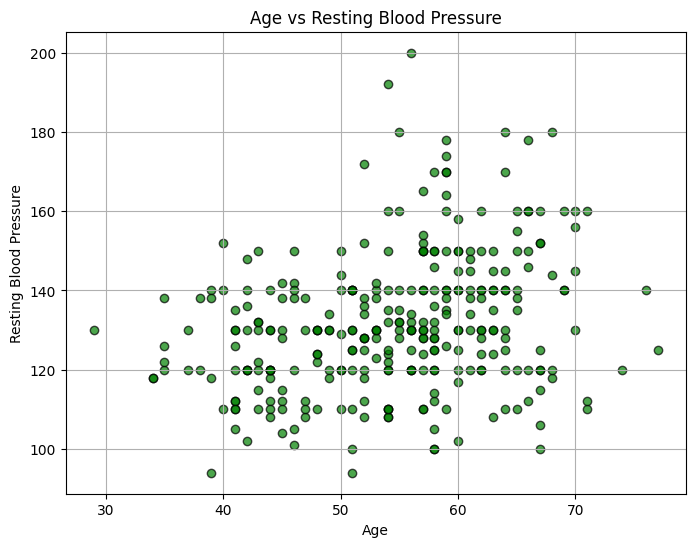

In [39]:
# Графік залежності віку від артеріального тиску
plt.figure(figsize=(8, 6))
plt.scatter(cleveland_data['age'], cleveland_data['trestbps'], alpha=0.7, color='green', edgecolor='black')
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.grid(True)
plt.show()

### Підрахувати коефіцієнт Пірсона та Спірмена для двох атрибутів. Кореляція

In [40]:
pearson_corr, _ = pearsonr(cleveland_data['age'], cleveland_data['trestbps'])
spearman_corr, _ = spearmanr(cleveland_data['age'], cleveland_data['trestbps'])
print(f"Spearman Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Spearman Correlation: 0.2849459193136903
Spearman Correlation: 0.29218326471011025


In [41]:
correlation_matrix = cleveland_data.corr(method='pearson')
print("Spearman Correlation:")
print(correlation_matrix)

spearman_matrix = cleveland_data.corr(method='spearman')
print("Spearman Correlation:")
print(spearman_matrix)


Spearman Correlation:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.359489  0.092891  0.232332  0.098707  0.118525  0.143967   
thal      0.127368  0.379300  0.264895  0.

### One Hot Encoding

In [ ]:
cp_encoded = pd.get_dummies(cleveland_data['cp'], prefix='cp')
cleveland_data_encoded = pd.concat([cleveland_data, cp_encoded], axis=1)

In [62]:
print(cleveland_data_encoded.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  cp_1.0  cp_2.0  cp_3.0  cp_4.0  
0    3.0  0.0   6.0       0    True   False   False   False  
1    2.0  3.0   3.0       2   False   False   False    True  
2    2.0  2.0   7.0       1   False   False   False    True  
3    3.0  0.0   3.0       0   False   False    True   False  
4    1.0  0.0   3.0       0   False    True   False   False  


In [43]:
# cleveland_data_encoded = pd.get_dummies(cleveland_data, drop_first=True)

### Провести візуалізацію багатовимірних даних

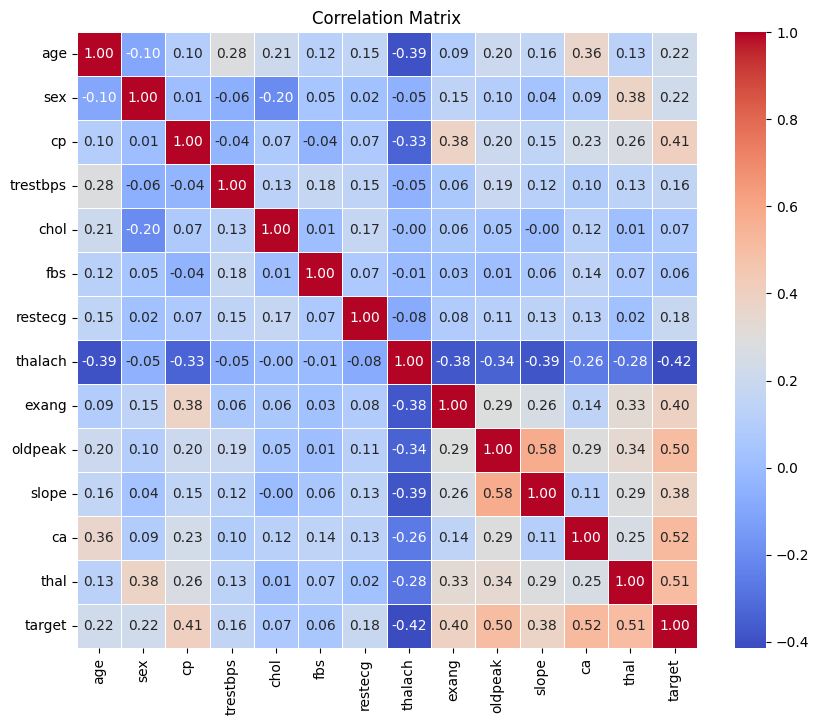

In [44]:
# Візуалізуємо кореляційну матрицю як теплову карту
correlation_matrix = cleveland_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


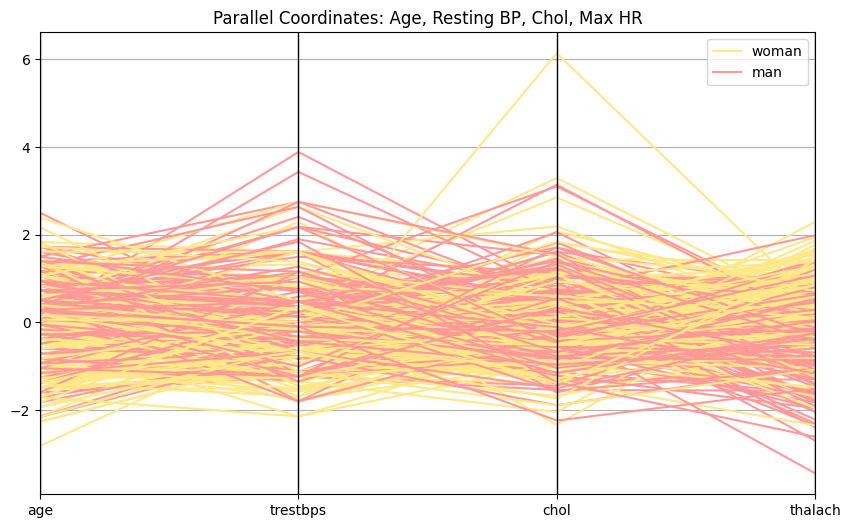

In [ ]:
data = cleveland_data 

cols = ['age', 'trestbps', 'chol', 'thalach']
subset_df = data[cols]

scaled_df = standardize(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, data['target_label']], axis=1)


plt.figure(figsize=(10, 6))
parallel_coordinates(final_df, 'target_label', color=('#FFE888', '#FF9999')) 
plt.title('Parallel Coordinates: Age, Resting BP, Chol, Max HR')
plt.show()

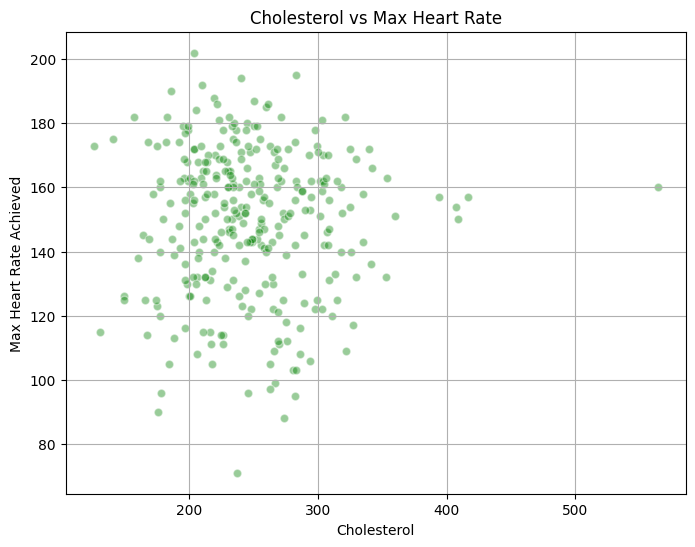

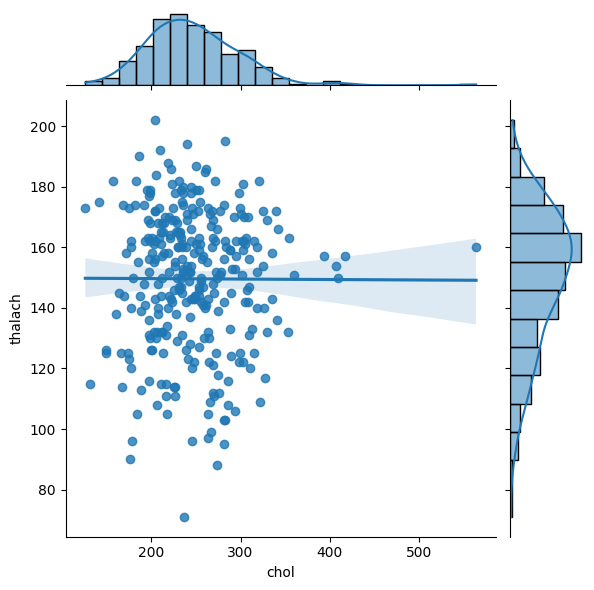

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(data['chol'], data['thalach'], alpha=0.4, edgecolors='w', color='green')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate Achieved')
plt.title('Cholesterol vs Max Heart Rate')
plt.grid(True)
plt.show()

sns.jointplot(x='chol', y='thalach', data=data, kind='reg', height=6, ratio=5)
plt.show()


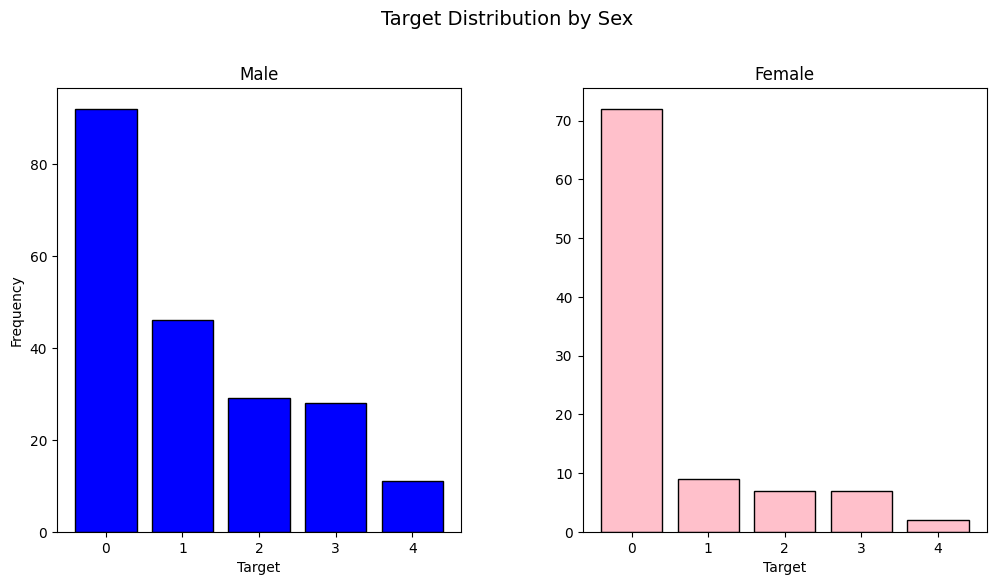

In [48]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle("Target Distribution by Sex", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Чоловіки
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Male")
ax1.set_xlabel("Target")
ax1.set_ylabel("Frequency")
male_data = data[data['sex'] == 1]
male_counts = male_data['target'].value_counts()
ax1.bar(male_counts.index, male_counts.values, color='blue', edgecolor='black', linewidth=1)

# Жінки
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Female")
ax2.set_xlabel("Target")
female_data = data[data['sex'] == 0]
female_counts = female_data['target'].value_counts()
ax2.bar(female_counts.index, female_counts.values, color='pink', edgecolor='black', linewidth=1)

plt.show()


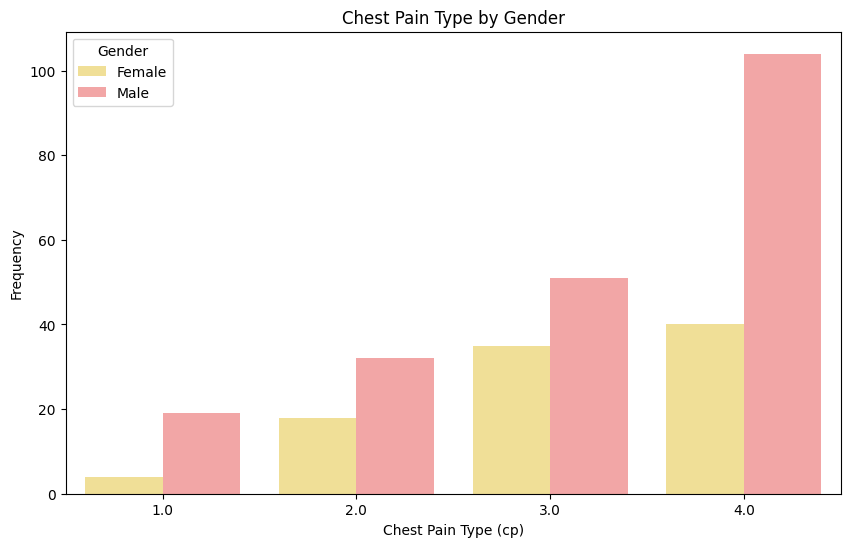

In [49]:
plt.figure(figsize=(10, 6))
cp = sns.countplot(x="cp", hue="sex", data=cleveland_data, 
                   palette={1: "#FF9999", 0: "#FFE888"})
plt.title('Chest Pain Type by Gender')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Frequency')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


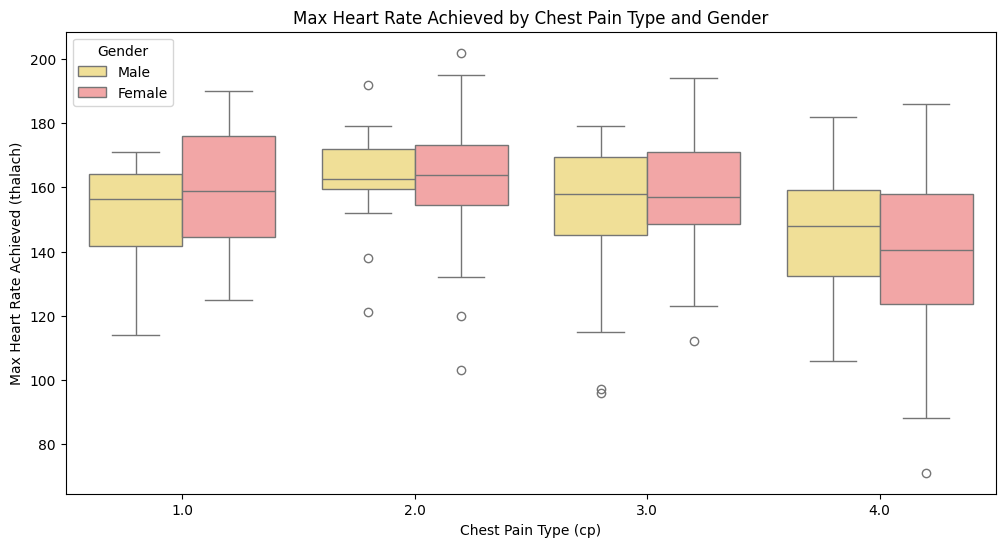

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="cp", y="thalach", hue="sex", data=cleveland_data, palette={1: "#FF9999", 0: "#FFE888"})
plt.title('Max Heart Rate Achieved by Chest Pain Type and Gender')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Max Heart Rate Achieved (thalach)')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Gender', loc='best')
plt.show()


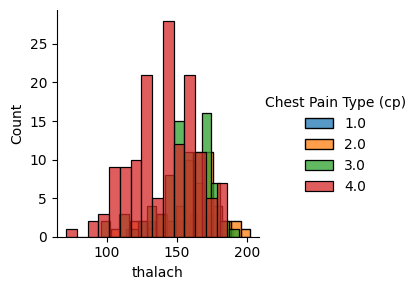

In [54]:
g = sns.FacetGrid(cleveland_data, hue='cp', palette="tab10")
g.map(sns.histplot, 'thalach', kde=False, bins=15)
g.add_legend(title='Chest Pain Type (cp)')
plt.show()
